## Introduction

In [1]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [3]:
import os
from pathlib import Path

path = Path('datasets/titanic')

## Cleaning the data

In [4]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isna().sum() # Get number of missing values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [7]:
df.fillna(modes, inplace=True)

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
import numpy as np

df.describe(include=(np.number)) # Get summary statistics for numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


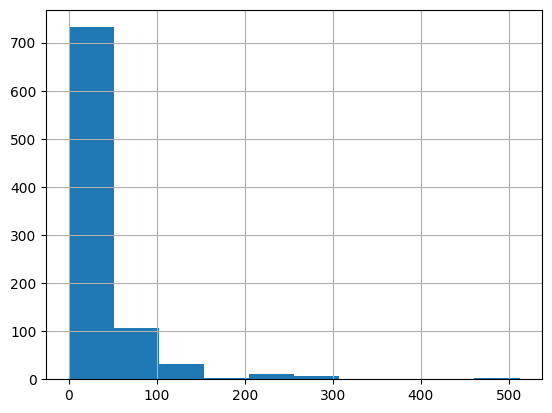

In [10]:
df['Fare'].hist(); # Plot a histogram of the 'Fare' column

In [11]:
df['LogFare'] = np.log(df['Fare']+1) # Take log to get normal distribution from long tail distribution

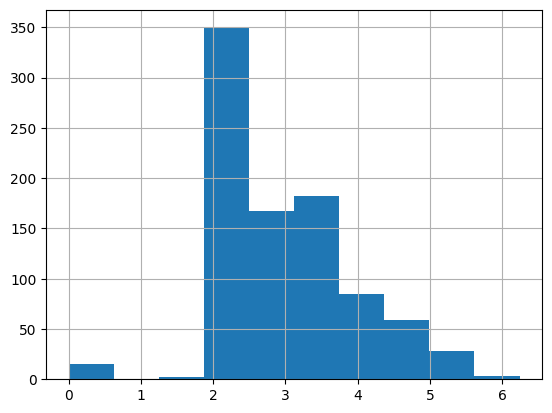

In [12]:
df['LogFare'].hist();

In [13]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [14]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [15]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [16]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,True,False,False,False,True,False,False,True
1,False,True,True,False,False,True,False,False
2,False,True,False,False,True,False,False,True
3,False,True,True,False,False,False,False,True
4,True,False,False,False,True,False,False,True


In [17]:
from torch import tensor

t_dep = tensor(df.Survived)

In [21]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

t_indep = tensor(df[indep_cols].values.astype(float), dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [22]:
t_indep.shape

torch.Size([891, 12])

## Setting up a linear model

In [24]:
torch.manual_seed(442) # To get reproducible results

n_coeff = t_indep.shape[1] # Getting the number of weights required, 1 for each column
coeffs = torch.rand(n_coeff)-0.5 # Randomly initializing the weights
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [25]:
t_indep*coeffs # Broadcasting the weights to the input tensor

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.2632,  -0.0000,   0.0000

In [26]:
vals,indices = t_indep.max(dim=0) # dim 0 is rows, hence get the max value for each column
t_indep = t_indep / vals # Normalizing the input tensor using broadcasting

In [27]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [28]:
preds = (t_indep*coeffs).sum(axis=1) # Forward pass to get predictions, then summing across columns (i.e add all values in the same row together)

In [29]:
preds[:10] # Getting the first 10 predictions

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285])

In [30]:
loss = torch.abs(preds-t_dep).mean() # Using mean absolute error as the loss function
loss

tensor(0.5382)

In [31]:
# Creating functions for forward pass and loss calculation for easier use
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

## Doing a gradient descent step

In [32]:
coeffs.requires_grad_() # Underscore at the end of a PyTorch method means it will modify the tensor in place

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [33]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [34]:
loss.backward() # Actual step where the gradients are calculated

In [35]:
coeffs.grad

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,  0.1425, -0.1886, -0.0191,  0.2043])

In [36]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.0212,  0.0258, -0.0082, -0.0969,  0.4198, -0.4265, -0.2424, -0.0494,  0.2851, -0.3771, -0.0382,  0.4085])

In [37]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1) # 0.1 is the learning rate
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4945)


## Training the linear model

In [38]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [39]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [40]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [41]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [42]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [43]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [44]:
coeffs = train_model(epochs=18, lr=0.2)

0.536; 0.502; 0.477; 0.454; 0.431; 0.409; 0.388; 0.367; 0.349; 0.336; 0.330; 0.326; 0.329; 0.304; 0.314; 0.296; 0.300; 0.289; 

In [45]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'LogFare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

## Measuring accuracy

In [46]:
preds = calc_preds(coeffs, val_indep) # Calculate predictions on validation set

In [47]:
results = val_dep.bool()==(preds>0.5) # Compare predictions to actual values
results[:16] # Display first 16 results

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [48]:
results.float().mean() # Calculate accuracy

tensor(0.7865)

In [49]:
# Create a function to calculate accuracy
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7865)

## Using sigmoid

In [50]:
preds[:28]

tensor([ 0.8160,  0.1295, -0.0148,  0.1831,  0.1520,  0.1350,  0.7279,  0.7754,  0.3222,  0.6740,  0.0753,  0.0389,  0.2216,  0.7631,
         0.0678,  0.3997,  0.3324,  0.8278,  0.1078,  0.7126,  0.1023,  0.3627,  0.9937,  0.8050,  0.1153,  0.1455,  0.8652,  0.3425])

In [51]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [60]:
coeffs = train_model(lr=10)

0.510; 0.351; 0.310; 0.282; 0.264; 0.253; 0.246; 0.241; 0.237; 0.234; 0.232; 0.230; 0.228; 0.226; 0.225; 0.224; 0.223; 0.222; 0.221; 0.221; 0.220; 0.219; 0.219; 0.218; 0.217; 0.217; 0.216; 0.216; 0.215; 0.215; 

In [61]:
acc(coeffs)

tensor(0.8315)

In [62]:
show_coeffs()

{'Age': tensor(-0.8327),
 'SibSp': tensor(-0.3724),
 'Parch': tensor(-0.0007),
 'LogFare': tensor(0.0751),
 'Sex_male': tensor(-3.9947),
 'Sex_female': tensor(3.1501),
 'Pclass_1': tensor(1.5544),
 'Pclass_2': tensor(1.1129),
 'Pclass_3': tensor(-1.8529),
 'Embarked_C': tensor(0.2523),
 'Embarked_Q': tensor(0.7007),
 'Embarked_S': tensor(-1.0860)}

## Submitting to Kaggle

In [ ]:
tst_df = pd.read_csv(path/'test.csv')

In [ ]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

In [ ]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [ ]:
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

In [ ]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [ ]:
!head sub.csv

## Using matrix product

In [63]:
(val_indep*coeffs).sum(axis=1)

tensor([ 4.7451, -5.3706, -5.8197, -4.1033, -4.1963, -4.3310,  1.5399,  2.9173, -7.1305,  1.2910, -7.2404, -5.8582, -6.9919,  1.7744,
        -7.2633, -3.9548, -4.1630,  2.9564, -4.3341, -0.0842, -7.1571, -4.0693,  4.5610,  2.6810, -7.1167, -5.4045,  0.1842, -4.1317,
        -7.0833,  1.7742,  3.0212, -0.1418, -7.1051, -7.2246,  4.6827,  0.0457, -3.9727,  4.7583, -7.1569, -0.0692, -4.1362, -7.1569,
        -4.3083,  4.6761, -7.1153, -0.1716, -7.1555, -7.1578, -5.3718,  0.0076, -2.2364, -7.2137, -7.1719, -7.1687, -4.2090, -4.2715,
        -5.3706, -7.3211, -7.1257, -7.1961, -2.4598, -7.1320, -4.3177, -7.1259,  2.7121, -3.6925, -4.1858, -7.3008, -5.5762,  2.7408,
        -7.1779,  1.3331, -4.2611, -7.1551, -3.7365, -7.0740, -7.1569, -3.9141, -4.1338, -4.4236, -4.0270,  4.7120, -7.1467, -7.1580,
         2.6860, -2.8913, -2.3653,  3.4837,  4.2161, -4.1754, -7.2398, -7.1569,  4.7009, -5.8822,  1.4847, -2.9725, -4.4069,  1.6934,
         1.7950, -5.3200, -7.1414,  1.7742, -7.2404, -7.2196, 

In [64]:
val_indep@coeffs # Getting the same result as above using matrix multiplication

tensor([ 4.7451, -5.3706, -5.8197, -4.1033, -4.1963, -4.3310,  1.5399,  2.9173, -7.1305,  1.2910, -7.2404, -5.8582, -6.9919,  1.7744,
        -7.2633, -3.9548, -4.1630,  2.9564, -4.3341, -0.0842, -7.1571, -4.0693,  4.5610,  2.6810, -7.1167, -5.4045,  0.1842, -4.1317,
        -7.0833,  1.7742,  3.0212, -0.1418, -7.1051, -7.2246,  4.6827,  0.0457, -3.9727,  4.7583, -7.1569, -0.0692, -4.1362, -7.1569,
        -4.3083,  4.6761, -7.1153, -0.1716, -7.1555, -7.1578, -5.3718,  0.0076, -2.2364, -7.2137, -7.1719, -7.1687, -4.2090, -4.2715,
        -5.3706, -7.3211, -7.1257, -7.1961, -2.4598, -7.1320, -4.3177, -7.1259,  2.7121, -3.6925, -4.1858, -7.3008, -5.5762,  2.7408,
        -7.1779,  1.3331, -4.2611, -7.1551, -3.7365, -7.0740, -7.1569, -3.9141, -4.1338, -4.4236, -4.0270,  4.7120, -7.1467, -7.1580,
         2.6860, -2.8913, -2.3653,  3.4837,  4.2161, -4.1754, -7.2398, -7.1569,  4.7009, -5.8822,  1.4847, -2.9725, -4.4069,  1.6934,
         1.7950, -5.3200, -7.1414,  1.7742, -7.2404, -7.2196, 

In [65]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [66]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [67]:
# Converting vectors to matrices
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [68]:
coeffs = train_model(lr=10)

0.512; 0.344; 0.302; 0.277; 0.261; 0.252; 0.245; 0.240; 0.236; 0.234; 0.231; 0.229; 0.227; 0.226; 0.225; 0.224; 0.223; 0.222; 0.221; 0.220; 0.220; 0.219; 0.218; 0.218; 0.217; 0.217; 0.216; 0.216; 0.215; 0.215; 

In [69]:
acc(coeffs)

tensor(0.8315)

## A neural network

In [71]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden # Centering the weights around 0
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [72]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps): # Forward pass
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [73]:
def update_coeffs(coeffs, lr): # Backpropagation
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [74]:
coeffs = train_model(lr=1.4)

0.543; 0.532; 0.520; 0.505; 0.487; 0.466; 0.439; 0.407; 0.373; 0.343; 0.319; 0.301; 0.286; 0.274; 0.264; 0.256; 0.250; 0.245; 0.240; 0.237; 0.234; 0.231; 0.229; 0.227; 0.226; 0.224; 0.223; 0.222; 0.221; 0.220; 

In [75]:
coeffs = train_model(lr=20)

0.543; 0.400; 0.260; 0.390; 0.221; 0.211; 0.197; 0.195; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [76]:
acc(coeffs)

tensor(0.8258)

## Deep learning

In [84]:
hiddens = [10, 10] # 2 hidden layers with 10 neurons each
hiddens

[10, 10]

In [85]:
sizes = [n_coeff] + hiddens + [1] # Input neurons, hidden layer neurons, output neron (1 for binary classification)
sizes

[12, 10, 10, 1]

In [86]:
n = len(sizes)
n


4

In [87]:
# Randomly initializing weights for each layer
# Between each layer, the number of weights is the product of the number of neurons in the current and next layer
# We divide by the number of neurons in the next layer to prevent vanishing/exploding gradients
layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
layers


[tensor([[-0.0535, -0.0843,  0.1248,  0.2109, -0.0405,  0.2721,  0.1061,  0.2360,  0.1138,  0.0377],
         [-0.0413, -0.1082,  0.0245,  0.1408,  0.0947,  0.2338,  0.0990,  0.0388, -0.0582, -0.0299],
         [ 0.1557, -0.0584, -0.0244,  0.2449,  0.2495,  0.2095, -0.1121,  0.1747, -0.0685,  0.2426],
         [-0.1043,  0.0533,  0.1500,  0.1536,  0.1492,  0.1182, -0.1168,  0.0637, -0.0255,  0.2642],
         [ 0.2118,  0.1957,  0.2773, -0.0710,  0.2311,  0.0271,  0.0988,  0.1142,  0.1665, -0.0186],
         [-0.1042,  0.2017,  0.2416,  0.0691, -0.1193,  0.0703,  0.2274,  0.0700,  0.2566, -0.0206],
         [ 0.2244, -0.0731, -0.0640, -0.0964, -0.0475,  0.1735,  0.2540,  0.0470, -0.0217,  0.2591],
         [ 0.1502,  0.0102,  0.0380,  0.0990, -0.0107, -0.0782,  0.0202,  0.2351, -0.1076,  0.1800],
         [ 0.0171, -0.0406,  0.0467,  0.1412,  0.0260, -0.0600,  0.1383,  0.1068, -0.0934, -0.0971],
         [ 0.1067,  0.0533, -0.0486, -0.0513,  0.2125,  0.2588, -0.0882, -0.0181,  0.0284, 

In [88]:
consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
consts


[tensor(0.0105), tensor(-0.0427), tensor(0.0115)]

In [89]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)] # Initializing weights
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)] # Initializing biases
    for l in layers+consts: l.requires_grad_() # Setting requires_grad to True for backpropagation
    return layers,consts

In [78]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [79]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [80]:
coeffs = train_model(lr=4)

0.521; 0.483; 0.427; 0.379; 0.379; 0.379; 0.379; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.377; 0.376; 0.371; 0.333; 0.239; 0.224; 0.208; 0.204; 0.203; 0.203; 0.207; 0.197; 0.196; 0.195; 

In [81]:
acc(coeffs)

tensor(0.8258)